*All content and data presented in the articles on this platform are sourced from the comprehensive boxset titled “Market Risk Analysis” by Carol Alexander. The author of the articles acknowledges and respects the intellectual property rights and copyrights held by the original author of the boxset. The purpose of sharing this information is solely for educational and informational purposes, and no infringement of intellectual property rights is intended*.

# Tracking Error and Active Risk 

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import pathlib
import sys
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
utils_path = pathlib.Path().absolute().parent.parent
sys.path.append(utils_path.__str__())
import utils.layout as lay

In [2]:
pio.templates.default = 'simple_white+blog_mra'

## Active returns and active weights

* **Ex Ante**: This term refers to the analysis and estimation of risk and return before an investment is made. Ex ante measures are based on expected or forecasted values. Investors and analysts use ex ante measures to assess the potential risks and returns of an investment prospect.
* **Ex Post**: This term refers to the analysis and measurement of risk and return after an investment period has ended. Ex post measures are based on actual values and realized outcomes. Investors and analysts use ex post measures to evaluate the actual risk and return of an investment.

*Active return* is also commonly called the relative return. It is a difference between the
portfolio’s return and the benchmark return. Thus if $V_{P}$ and $V_{B}$ denote the values of the portfolio and the benchmark respectively, then the one-period ex post active return on the portfolio, measured at
time t, is

\begin{equation}
R_{t} = \frac{1+R_{Pt}}{1+R_{Bt}} -1
\end{equation}

where $R_{P, t} = (V_{P, t} - V_{P, t-1}) / V_{P, t-1} $ and $R_{B, t} = (V_{B, t} - V_{B, t-1}) / V_{B, t-1} $. However, to asses risk over a short horizon and with frequent observations e.g. daily, using log returns if preferable. In this case, the one-period ex post log returns and ex post active log returns are

\begin{equation}
r_{Pt} = ln(\frac{V_{Pt}}{V_{P, t-1}}),  \quad r_{Bt} = ln(\frac{V_{Bt}}{V_{B, t-1}}), \quad r_{t} = r_{Pt} - r_{Bt}
\end{equation}

Using the log approximation, the portfolio active return can be calculated as  

\begin{equation}
r_{t} = \sum_{i=1}^{k} (w_{Pit} - w_{Bit})r_{it}
\end{equation}

where $w_{it} = w_{Pit} - w_{Bit}$ are the portfolio's *active weights*.
If we denote the active return at time $t$ by $R_{T}$ and the average active return over the sample by $\bar{R}$, the ex post tracking error (TE) is estimated as

\begin{equation}
TE = \sqrt{\frac{1}{T-1}\sum_{t=1}^{T}(R_{t} - \bar{R})^2}
\end{equation}

which is hence equal to the standard deviation of the active returns

### *Example: tracking error* 

*A fund’s values and its benchmark values between 1990 and 2006.
The data cover a period of 16 years and for comparison the value of the benchmark and of
the funds are set to 100 at the beginning of the period*

In [3]:
df = pd.read_excel(r"data/Examples_II.1.xls", sheet_name="Ex_II.1.9", skiprows=21)
df = df.loc[:, "Date": "Fund"].set_index("Date")
ret = df.pct_change()[1:]

### *(1) Tracking Error = 0*

*The fund returns exactly 1% less than the benchmark during every month in the
sample. More precisely, the active return on the fund is exactly −1% each month. What is
the tracking error on this fund?*

In [4]:
# TE = 0
ret["Fund2"] = ret["Benchmark"] - 0.01
te_ex1 = ((1+ret["Fund2"]) / (1+ret["Benchmark"] ) -1).std()
print("Tracking Error: {}".format(round(te_ex1, 2)))

Tracking Error: 0.0


### *(2) Low Tracking Error*

*What is the ex post tracking error of
the fund measured from these data? How risky is this fund?*

In [5]:
ret["TE"] = (1+ret["Fund"]) /(1+ret["Benchmark"]) - 1
print("Tracking Error: {}".format(round(ret["TE"].std(), 2)))
print("Mean Active Return: {}".format(round(ret["TE"].mean(),2)))

Tracking Error: 0.01
Mean Active Return: -0.04


In [7]:
fig = px.line(df)
fig.update_layout(height=600, width=900, title_text="Example of Tracking Error = 1%", legend_title = "", xaxis_title="", yaxis_title="Price")
fig.show()

### *Example: irrelevance of the benchmark for tracking error* 

*Consider one fund and two possible benchmarks, whose values are shown in the below table.
What is the ex post tracking error of the fund measured relative to each benchmark based
on these data?*

In [31]:
df = pd.read_excel(r"data/Examples_II.1.xls", sheet_name="Ex_II.1.10", skiprows=24)
df = df.loc[:, "Date": "Fund"].set_index("Date")
ret = df.pct_change()[1:]

$$
\begin{array}{lrrr}
\hline
 & Benchmark 1 & Benchmark 2 & Fund \\
Date &  &  &  \\
\hline
1990 & 100.00 & 100.00 & 100.00 \\
1991 & 90.00 & 92.75 & 91.00 \\
1992 & 103.50 & 109.99 & 103.74 \\
1993 & 124.20 & 136.01 & 126.56 \\
1994 & 161.46 & 182.19 & 167.06 \\
1995 & ... & ... & ... \\
\hline
\end{array}$$

In [32]:
ret["Active 1"] = (1+ret["Fund"] )/(1+ret["Benchmark 1"]) - 1
ret["Active 2"] = (1+ret["Fund"] )/(1+ret["Benchmark 2"]) - 1

In [33]:
m_actret_1 = ret["Active 1"].mean()
m_actret_2 = ret["Active 2"].mean()
te_1 = ret["Active 1"].std()
te_2 = ret["Active 2"].std()

print("Mean Active Return based on")
print("Benchmark 1: {}".format(round(m_actret_1, 2)))
print("Benchmark 2: {}".format(round(m_actret_2, 2)))
print("")
print("Tracking error based on")
print("Benchmark 1: {}".format(round(te_1, 2)))
print("Benchmark 2: {}".format(round(te_2, 2)))


Mean Active Return based on
Benchmark 1: -0.0
Benchmark 2: -0.03

Tracking error based on
Benchmark 1: 0.01
Benchmark 2: 0.01


In [34]:
fig = px.line(df)
fig.update_layout(height=600, width=900, title_text="Same Tracking Error (= 1%)", legend_title = "", xaxis_title="", yaxis_title="Price")
fig.show()

**Note**: the fund tracking benchmark 1 and has substantially
underperformed benchmark 2, despite having the same tracking error. This is why ex post tracking error is not a suitable risk metric for actively managed funds. It is only when a fund tracks a benchmark
closely that ex post tracking error is a suitable choice of risk metric

## Mean Adjusted Tracking Error

A risk measure that penalizes funds with high the mean of the active retuns is the *mean adjusted tracking error*:
\begin{equation}
MATE = \sqrt{\frac{1}{T}\sum_{i=t}^{T}R_{t}^{2}}
\end{equation}
\begin{equation}
(MATE)^2 = \frac{T-1}{T}(TE)^2 + \bar{R}^2
\end{equation}

Hence, the mean-adjusted tracking error will be larger than the tracking error when the mean
active return is quite different from zero

In [35]:
def mean_adjusted_tracking_error(active_returns):
    return np.sqrt((active_returns**2).mean())

In [36]:
print("Tracking Error Fund 1: {}".format(round(mean_adjusted_tracking_error(ret["Active 1"]),2)))
print("Tracking Error Fund 2: {}".format(round(mean_adjusted_tracking_error(ret["Active 2"]),3)))

Tracking Error Fund 1: 0.01
Tracking Error Fund 2: 0.033


### *Example: interpretation of mean-adjusted tracking error*

<em>Calculate the ex post mean-adjusted tracking error for:
- the fund relative to its benchmark; and
- the fund relative to both benchmarks. 
\
\
What can you infer from your results? </em>

In [40]:
df = pd.read_excel(r"data/Examples_II.1.xls", sheet_name="Ex_II.1.12", skiprows=24)
df = df.loc[:, "Date": "Fund A"].set_index("Date")
ret = df.pct_change()[1:]
ret["Active A"] = (1+ret["Fund A"] )/(1+ret["Benchmark"]) - 1
ret["Active B"] = (1+ret["Fund B"] )/(1+ret["Benchmark"]) - 1

In [48]:
fig = px.line(df)
fig.update_layout(height=600, width=900, title_text="Fund B has lower TE than Fund A - Why?", legend_title = "", xaxis_title="", yaxis_title="Price")
fig.show()

In [43]:
print("FUND A")
print("Active Return Mean: {}".format(round(ret["Active A"].mean(),3)))
print("Tracking Error: {}".format(round(ret["Active A"].std(),3)))
print("Tracking Error: {}".format(round(mean_adjusted_tracking_error(ret["Active A"]),3)))
print("")
print("FUND B")
print("Active Return Mean: {}".format(round(ret["Active B"].mean(),3)))
print("Tracking Error: {}".format(round(ret["Active B"].std(),3)))
print("Tracking Error: {}".format(round(mean_adjusted_tracking_error(ret["Active B"]),3)))

FUND A
Active Return Mean: 0.0
Tracking Error: 0.024
Tracking Error: 0.023

FUND B
Active Return Mean: -0.05
Tracking Error: 0.001
Tracking Error: 0.05


From the active returns, the funds mean and their squares, have been used to calculate the TE and
MATE for each fund. Only the MATE identifies that fund B is more risky than fund A.

## Ex ante tracking error

For the definition of an ex ante forecast of TE and of MATE we need to use a model for
expected returns, and the most usual type of model to employ for this is regression based
on a factor model discussed in this [article](https://baglinifinance.com/blog/single-factor-models/) on single factor model. However, in this case, Y represents not the ordinary return
but the active return on a fund. Likewise, the alpha and betas above are the relative alpha
and relative betas of the fund. These are the difference between the fund’s ordinary alpha
and factor betas and the benchmark’s alpha and factor betas.

Any forecast from a statistical model is a
distribution. We may choose to focus on a single point forecast, usually of the expectation
of this distribution, but the model still forecasts an entire distribution and this distribution is
specific to the estimated model.


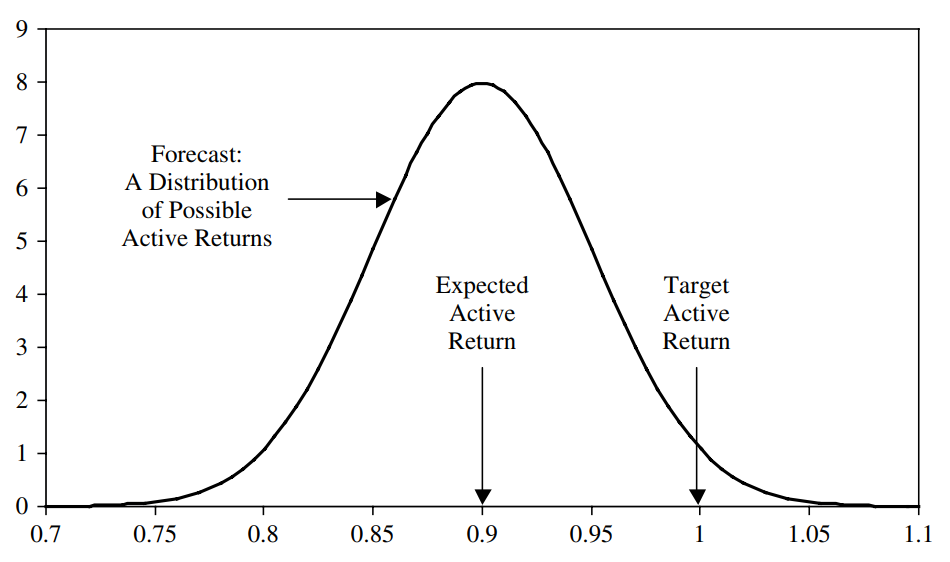

Now, if the target active return is not equal to E(Y),
which is very often the case, then there are two sources of risk relative to the benchmark:
* the risk arising from dispersion about the mean return (i.e. tracking error) and 
* the risk that
the mean return differs from the target return.  
\
**The tracking error ignores the second source
of active risk**

However, the mean-adjusted ex ante tracking error does take account of model predictions
for active returns that may differ from the target active return.

\begin{equation}
MATE = \sqrt{V(Y) + (E(Y) - Y^{\star})^2}
\end{equation}

where $Y^{\star}$ is the target active return and E(Y) and V(Y) are forecast by the risk model.
